# Penjelasan Dataset

| Column Name                       | Data Type | Deskripsi                                                                                 |
| --------------------------------- | --------- | ----------------------------------------------------------------------------------------- |
| Unnamed: 0                        | int64     | Index atau nomor urut data. Tidak memiliki makna analitis.                                |
| id                                | int64     | ID unik untuk setiap pelanggan/penerbangan.                                               |
| Gender                            | object    | Jenis kelamin pelanggan (Male/Female).                                                    |
| Customer Type                     | object    | Jenis pelanggan (Loyal Customer / Disloyal Customer).                                     |
| Age                               | int64     | Usia pelanggan dalam tahun.                                                               |
| Type of Travel                    | object    | Tujuan perjalanan (Business travel / Personal Travel).                                    |
| Class                             | object    | Kelas penerbangan (Eco, Eco Plus, Business).                                              |
| Flight Distance                   | int64     | Jarak penerbangan dalam kilometer.                                                        |
| Inflight wifi service             | int64     | Penilaian layanan wifi di pesawat (skala 0–5).                                            |
| Departure/Arrival time convenient | int64     | Penilaian kenyamanan waktu keberangkatan/kedatangan (0–5).                                |
| Ease of Online booking            | int64     | Penilaian kemudahan pemesanan online (0–5).                                               |
| Gate location                     | int64     | Penilaian kenyamanan lokasi gate (0–5).                                                   |
| Food and drink                    | int64     | Penilaian makanan dan minuman (0–5).                                                      |
| Online boarding                   | int64     | Penilaian layanan boarding online (0–5).                                                  |
| Seat comfort                      | int64     | Penilaian kenyamanan kursi (0–5).                                                         |
| Inflight entertainment            | int64     | Penilaian hiburan selama penerbangan (0–5).                                               |
| On-board service                  | int64     | Penilaian pelayanan awak kabin (0–5).                                                     |
| Leg room service                  | int64     | Penilaian ruang kaki (0–5).                                                               |
| Baggage handling                  | int64     | Penilaian penanganan bagasi (0–5).                                                        |
| Checkin service                   | int64     | Penilaian layanan check-in (0–5).                                                         |
| Inflight service                  | int64     | Penilaian layanan keseluruhan selama penerbangan (0–5).                                   |
| Cleanliness                       | int64     | Penilaian kebersihan pesawat (0–5).                                                       |
| Departure Delay in Minutes        | int64     | Keterlambatan keberangkatan dalam menit.                                                  |
| Arrival Delay in Minutes          | float64   | Keterlambatan kedatangan dalam menit.                                                     |
| satisfaction                      | object    | Tingkat kepuasan pelanggan (Satisfied / Neutral or Dissatisfied) |


# Import Data


# Library yang digunakan

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
import math
from sklearn.preprocessing import LabelEncoder

## Load Dataset

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/dibimbing/Customer Satisfaction and Sentiment Analysis.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Exploration

In [ ]:
df = pd.read_csv(file_path)

## Menampilkan data

**`df.head()`** menampilkan beberapa baris teratas atau pertama dari dataset

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


**`df.info()`** memberikan ringkasan struktur DataFrame, termasuk jumlah baris, kolom, tipe data, nilai non-null, dan penggunaan memori, membantu memahami data sebelum analisis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         100000 non-null  int64  
 1   id                                 100000 non-null  int64  
 2   Gender                             100000 non-null  object 
 3   Customer Type                      100000 non-null  object 
 4   Age                                100000 non-null  int64  
 5   Type of Travel                     100000 non-null  object 
 6   Class                              100000 non-null  object 
 7   Flight Distance                    100000 non-null  int64  
 8   Inflight wifi service              100000 non-null  int64  
 9   Departure/Arrival time convenient  100000 non-null  int64  
 10  Ease of Online booking             100000 non-null  int64  
 11  Gate location                      10000

## Menampilkan ringkasan statistik

In [ ]:
df.describe(include=['int64', 'float64'])

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,99700.000000
mean,49999.500000,64925.805660,39.379330,1190.58611,2.728820,3.059130,2.75604,2.97566,3.203310,3.250760,3.440340,3.358180,3.382230,3.350560,3.631930,3.303820,3.64012,3.287260,14.823680,15.185727
std,28867.657797,37453.371794,15.110524,997.24029,1.327411,1.525273,1.39810,1.27692,1.329779,1.349273,1.319325,1.333403,1.288707,1.315464,1.180749,1.265286,1.17590,1.312158,38.206983,38.677722
min,0.000000,1.000000,7.000000,31.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,24999.750000,32554.750000,27.000000,414.00000,2.000000,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000,0.000000,0.000000
50%,49999.500000,64883.500000,40.000000,844.00000,3.000000,3.000000,3.00000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000,0.000000,0.000000
75%,74999.250000,97346.250000,51.000000,1744.00000,4.000000,4.000000,4.00000,4.00000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000,12.000000,13.000000
max,99999.000000,129880.000000,85.000000,4983.00000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,1592.000000,1584.000000


Dari hasil ringkasan statistik pada data ini :
- Rata-rata usia penumpang adalah 39.37
- Wifi dan Online booking paling rendah memiliki rata-rata rating paling rendah
- Rata-rata sebagian besar di rentang 3–4 → mayoritas pelanggan cukup puas
- Sebagian besar flight on-time, tapi ada beberapa kasus delay yang sangat lama

## Distribusi Data

- Dilakukan pemeriksaan distribusi data untuk mengetahui pola sebaran nilai pada setiap variabel.
- Pemeriksaan ini bertujuan untuk melihat apakah data berdistribusi normal atau tidak, sehingga dapat ditentukan metode analisis yang sesuai pada tahap selanjutnya.
- Pemriksaan persebaran data menggunakan Uji Kolmogorov–Smirnov karena jumlah data > 5000

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:

    # Standarisasi (Z-score)
    data_z = (df[col] - df[col].mean()) / df[col].std()

    # Drop NA jika ada
    data_z = data_z.dropna()

    # Uji KS
    stat, p = kstest(data_z, 'norm')

    print(f"Kolom: {col}")
    print(f"  Statistik uji : {stat:.4f}")
    print(f"  p-value       : {p:.6f}")

    if p > 0.05:
        print("  ➜ Data berdistribusi normal\n")
    else:
        print("  ➜ Data tidak berdistribusi normal\n")

Kolom: Unnamed: 0
  Statistik uji : 0.0572
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: id
  Statistik uji : 0.0572
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: Age
  Statistik uji : 0.0544
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: Flight Distance
  Statistik uji : 0.1576
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: Inflight wifi service
  Statistik uji : 0.1589
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: Departure/Arrival time convenient
  Statistik uji : 0.1925
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: Ease of Online booking
  Statistik uji : 0.1489
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: Gate location
  Statistik uji : 0.1570
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: Food and drink
  Statistik uji : 0.1752
  p-value       : 0.000000
  ➜ Data tidak berdistribusi no

Distribusi tidak normal pada data penjualan merupakan fenomena yang wajar dan umum terjadi dalam sistem e-commerce.Pola ini mencerminkan adanya ketimpangan nilai transaksi, di mana sebagian besar transaksi bernilai kecil hingga menengah, sementara sebagian kecil transaksi memiliki nilai yang jauh lebih tinggi.

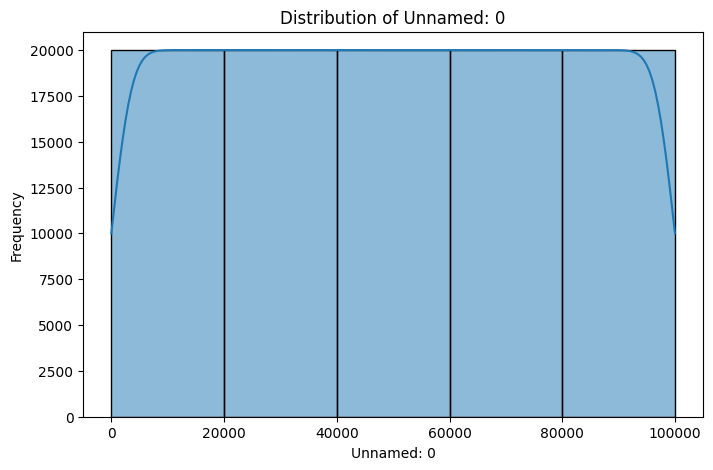

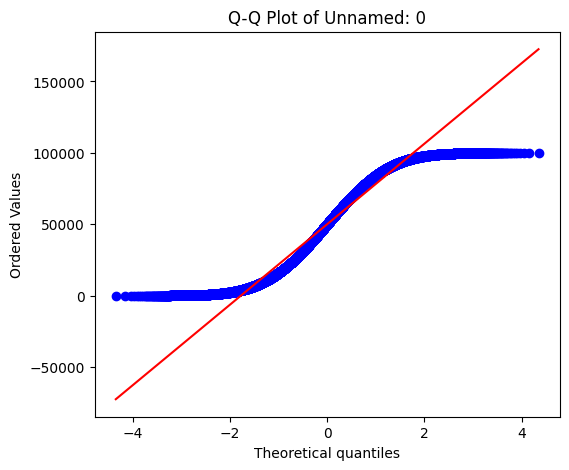

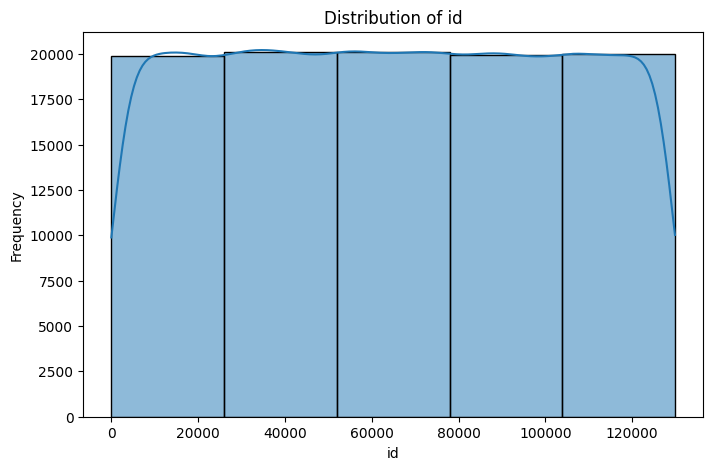

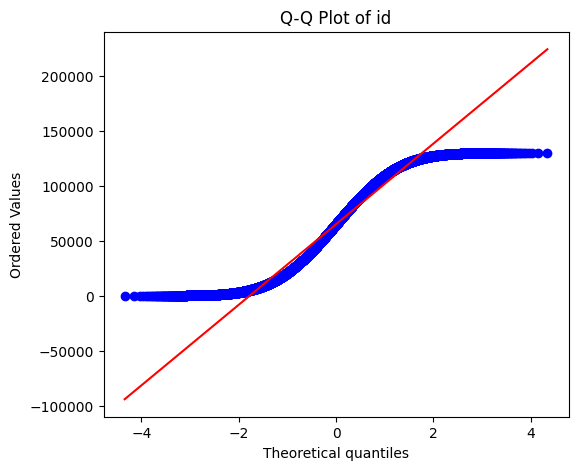

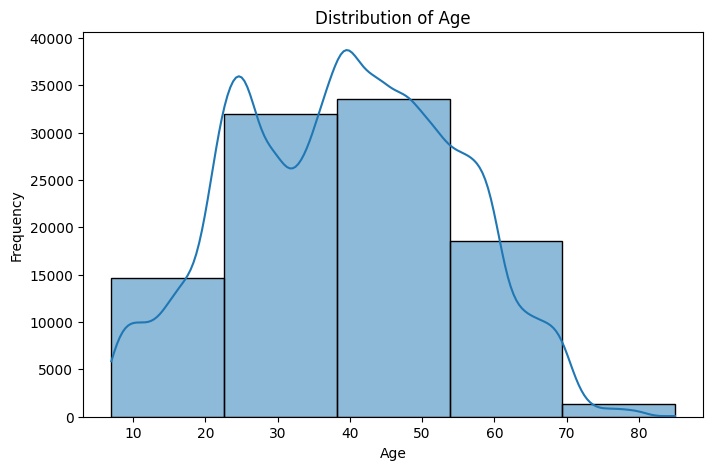

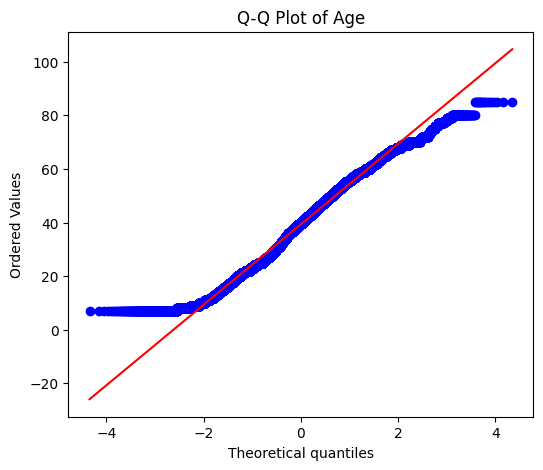

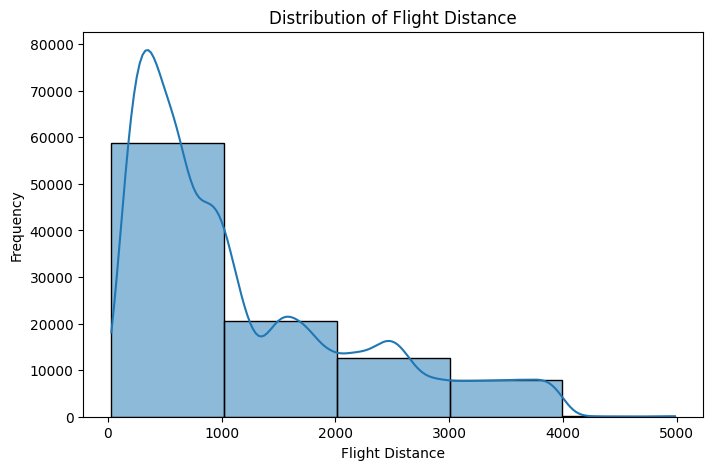

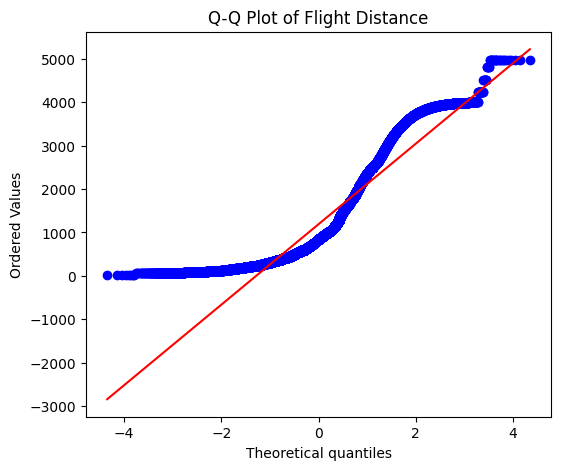

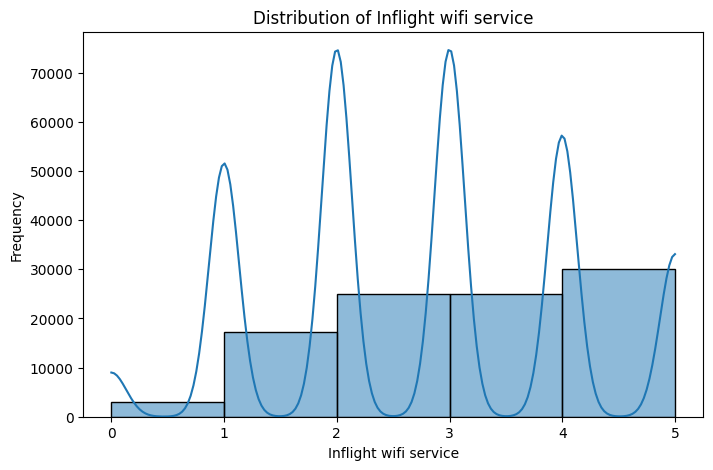

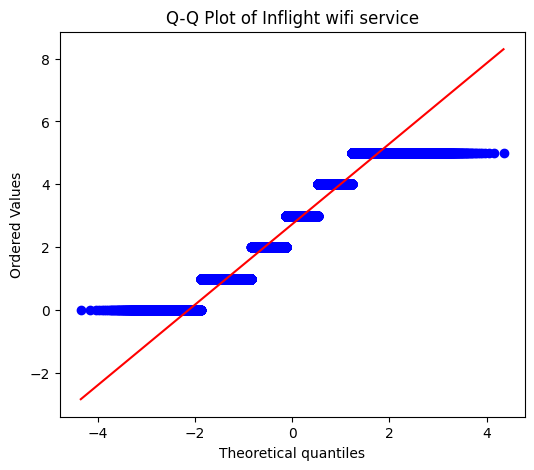

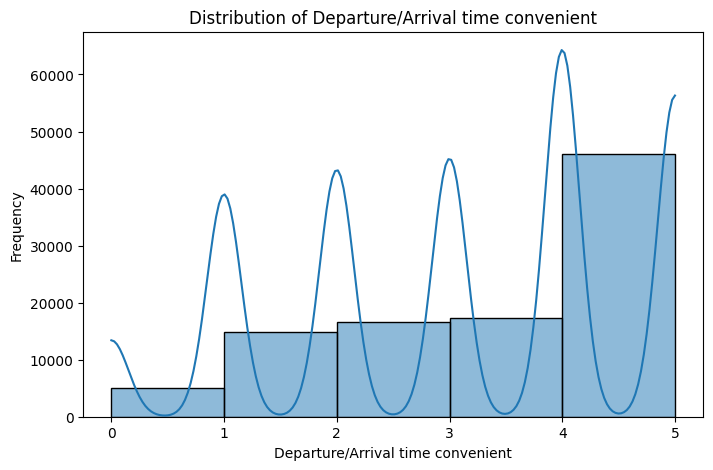

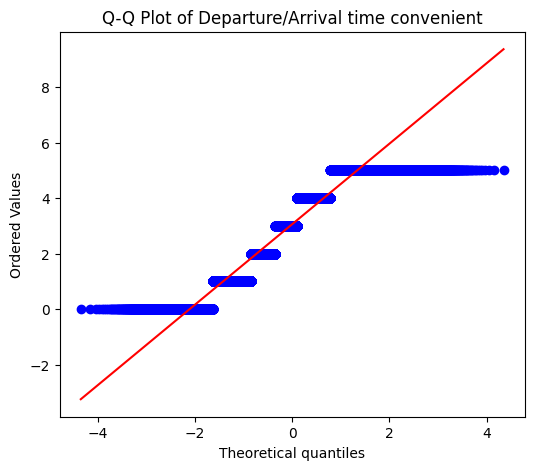

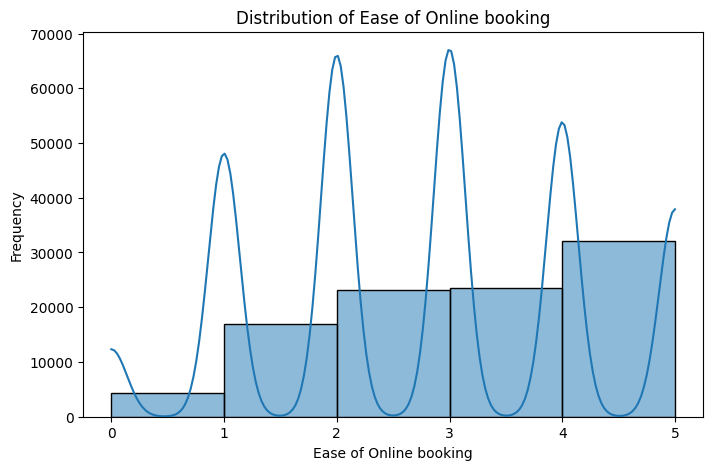

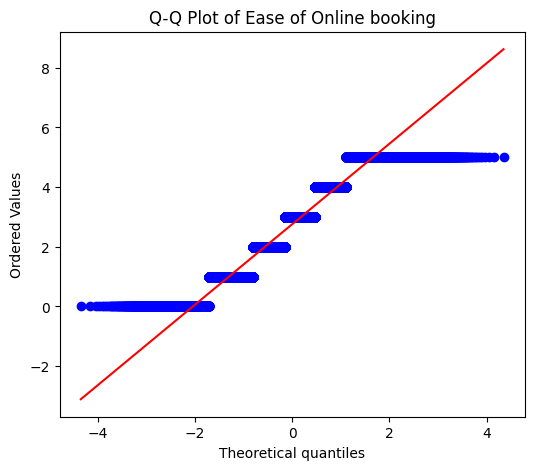

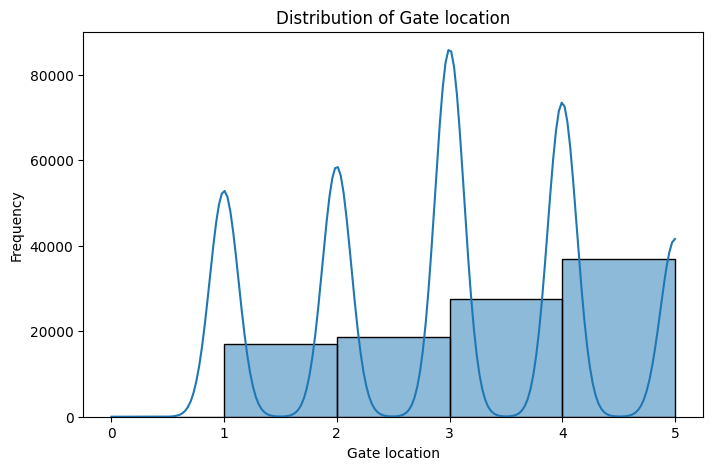

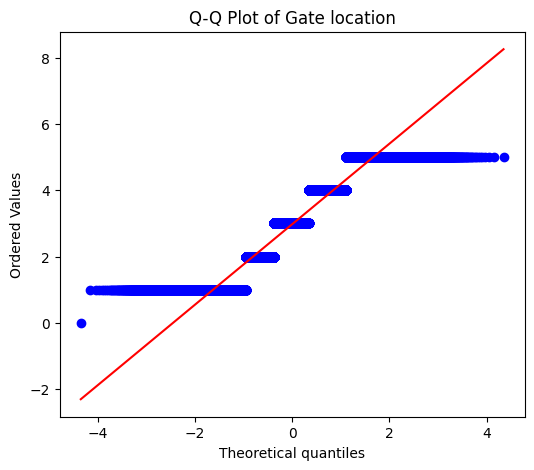

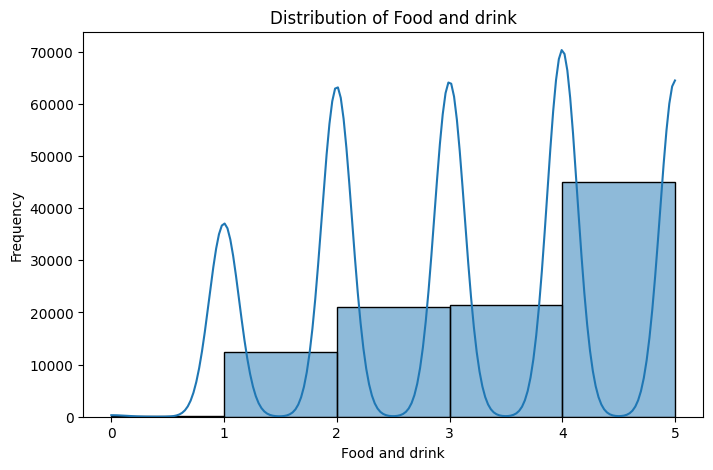

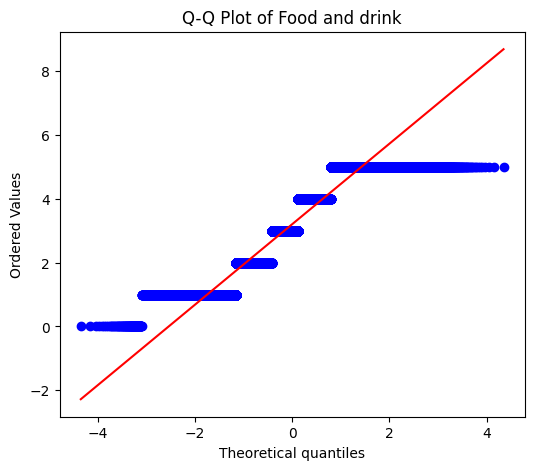

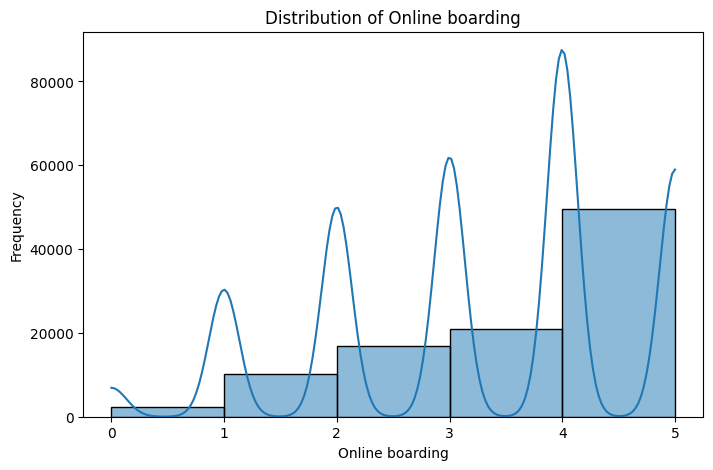

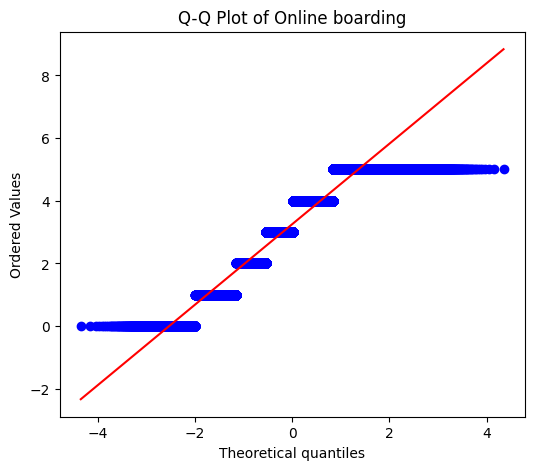

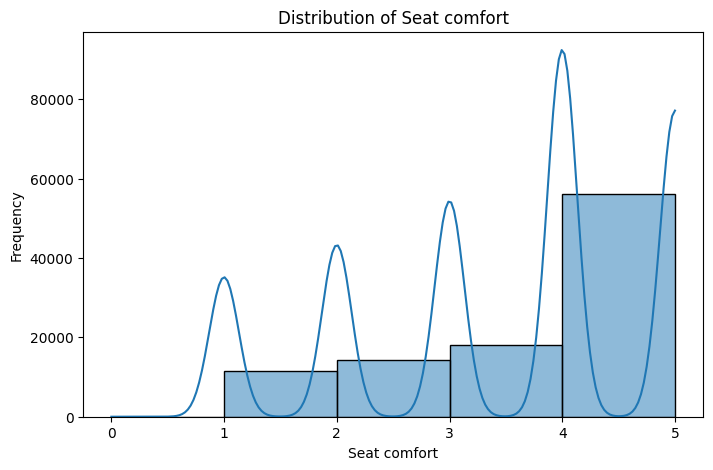

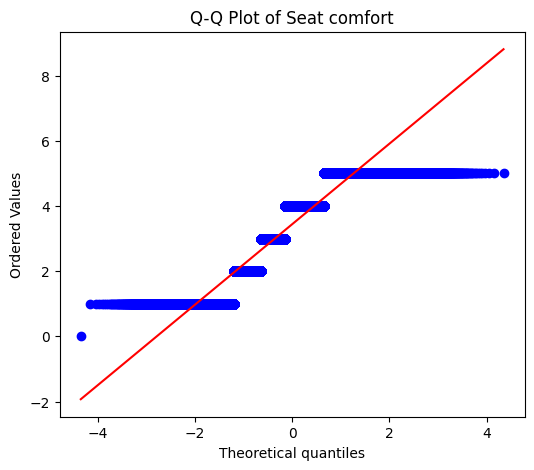

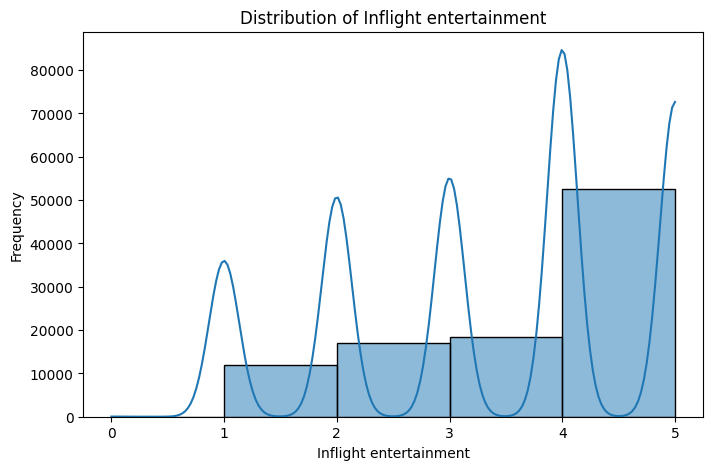

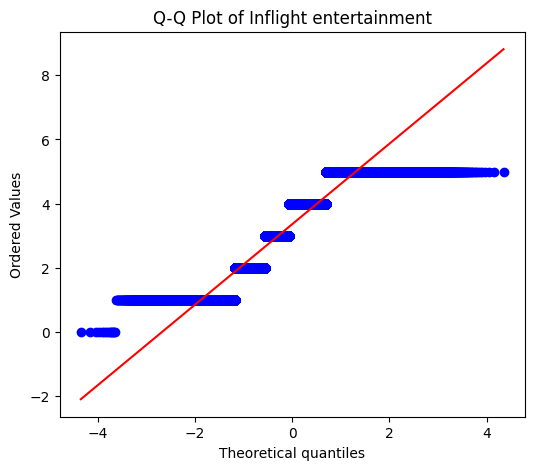

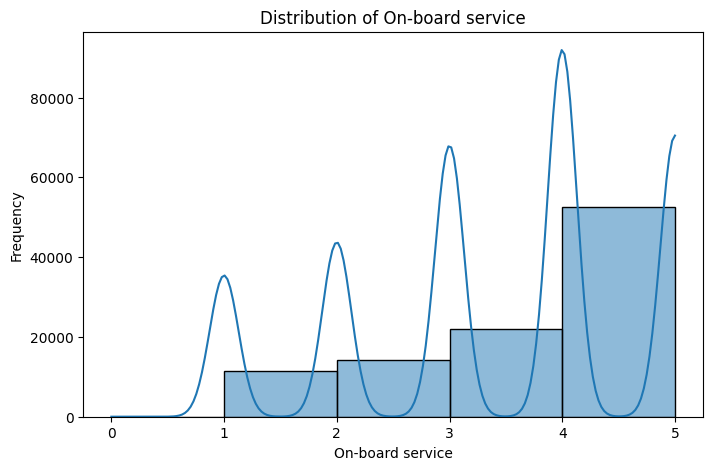

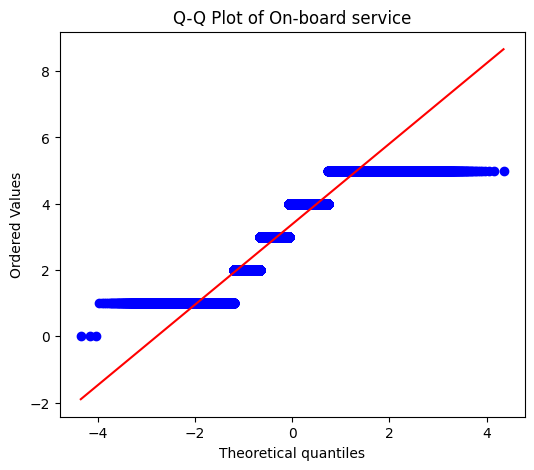

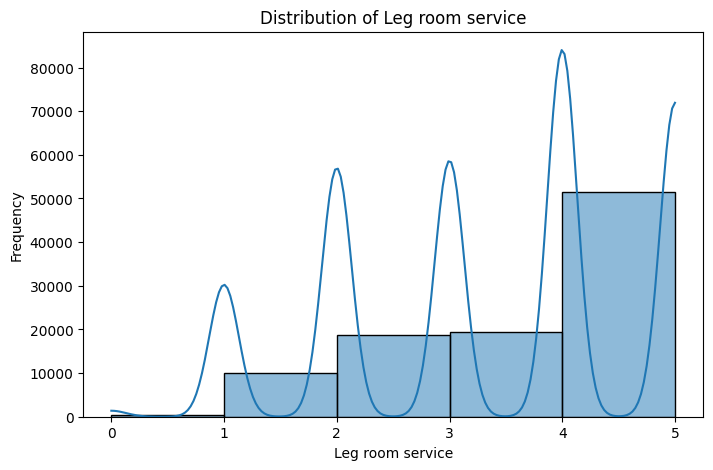

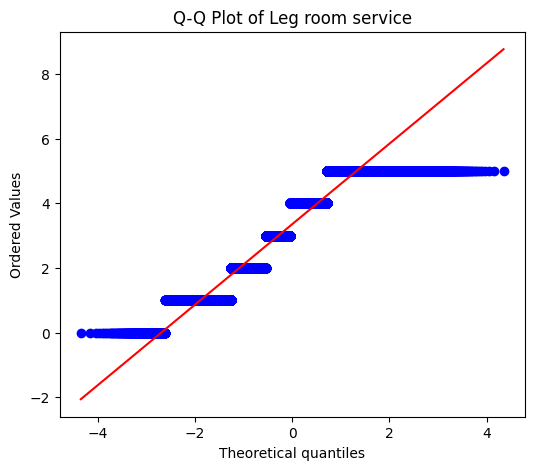

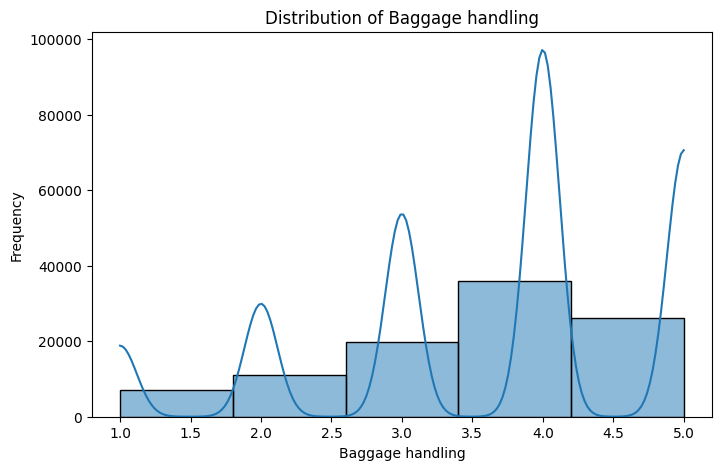

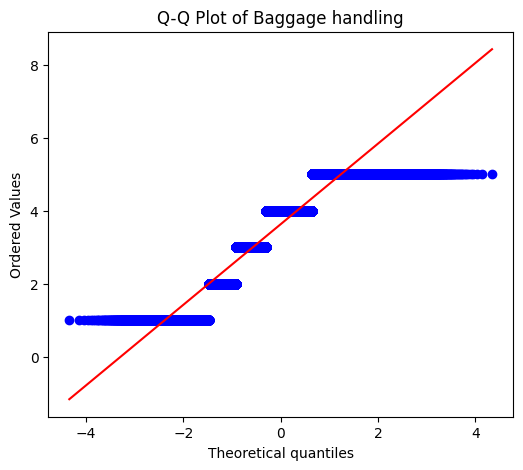

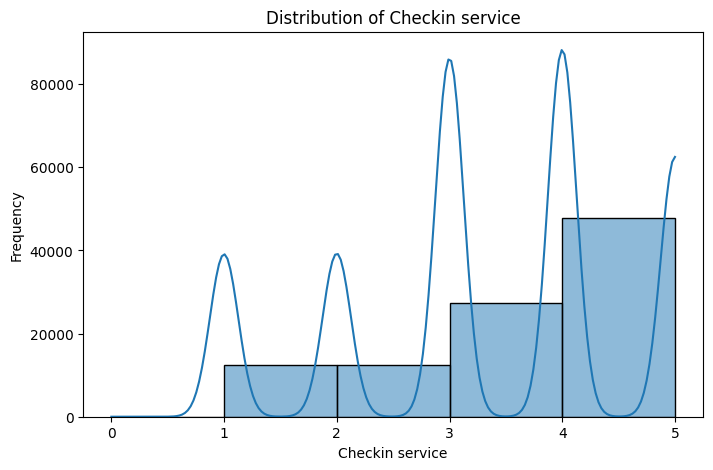

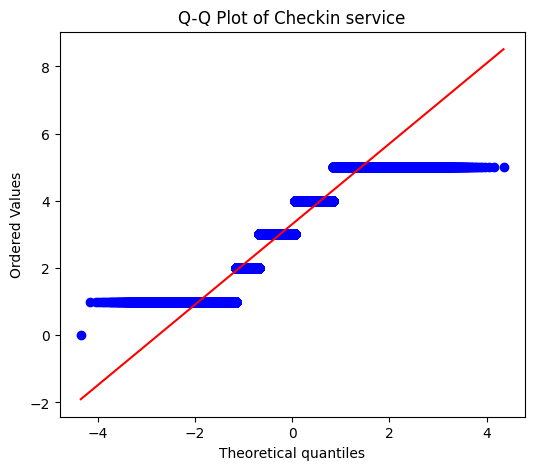

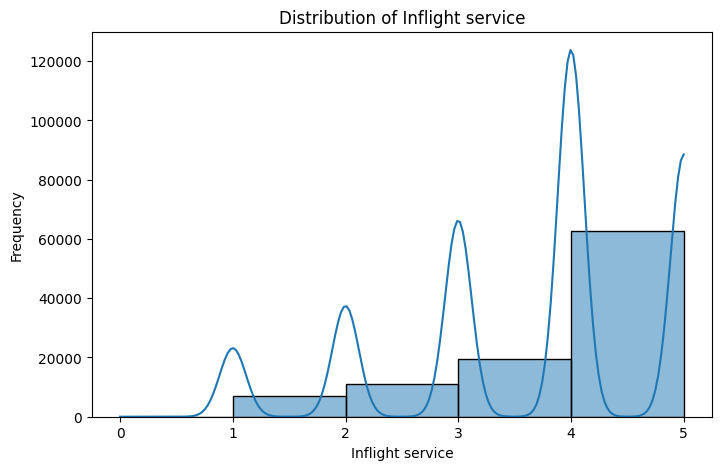

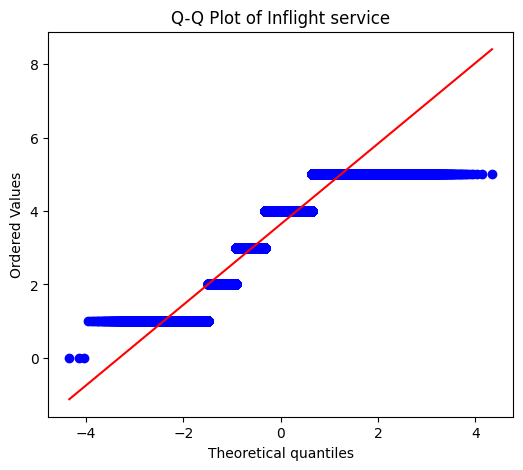

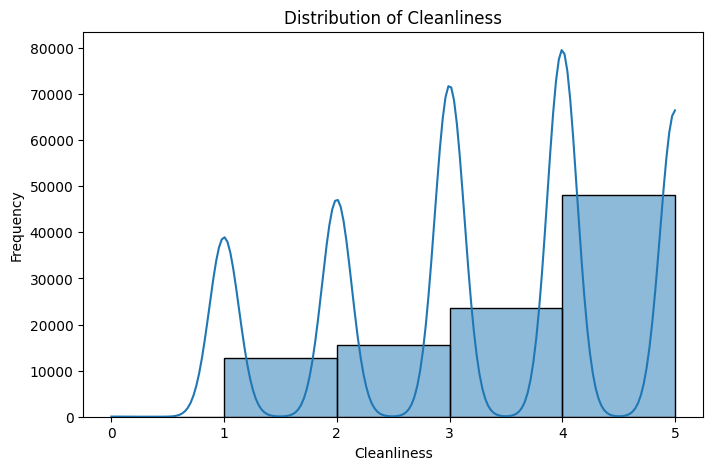

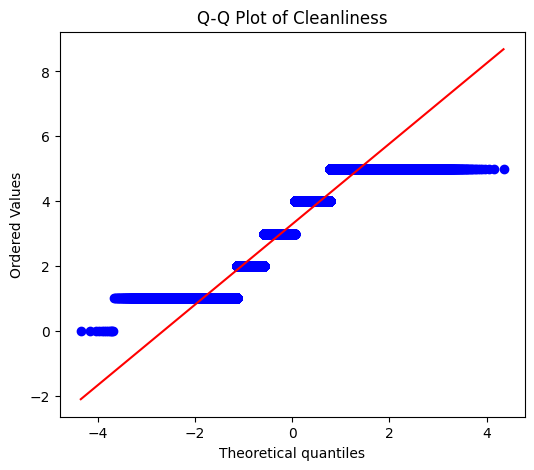

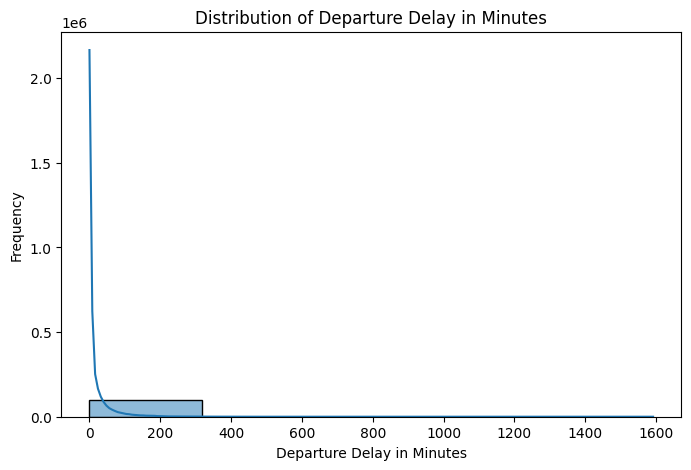

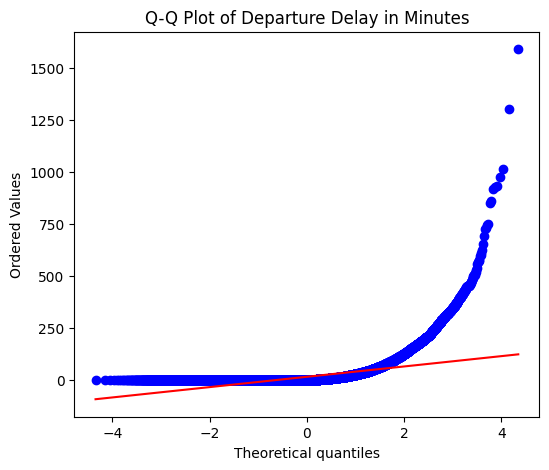

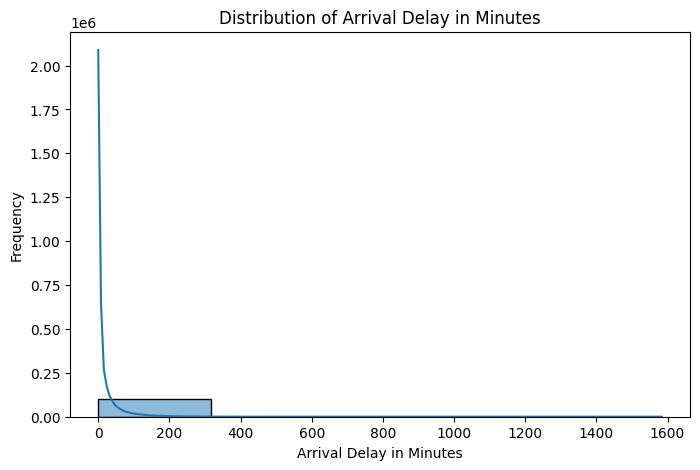

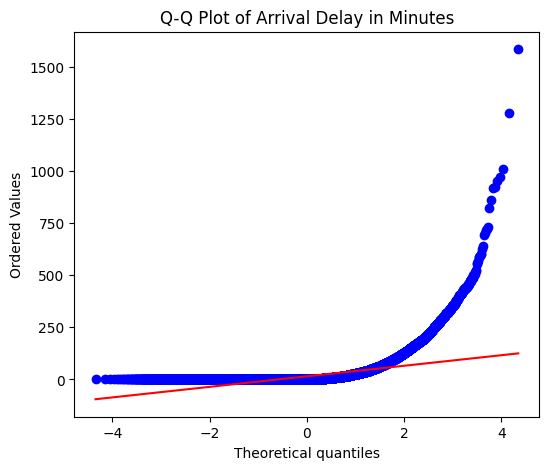

In [ ]:
# Mengambil semua kolom dengan tipe data numerik (int dan float)
# Kolom bertipe datetime atau object otomatis tidak ikut
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Melakukan perulangan untuk setiap kolom numerik
for col in numeric_cols:

    # Menghapus nilai NaN agar tidak mengganggu visualisasi
    data = df[col].dropna()

    # HISTOGRAM

    # Mengatur ukuran figure
    plt.figure(figsize=(8,5))

    # Membuat histogram dengan 5 interval (bins)
    # kde=True menambahkan kurva distribusi
    sns.histplot(data, bins=5, kde=True, edgecolor='black')

    # Memberikan label dan judul
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

    # Menampilkan histogram
    plt.show()

    # Q-Q PLOT

    # Membuat figure baru
    plt.figure(figsize=(6,5))

    # Membandingkan distribusi data dengan distribusi normal
    probplot(data, dist="norm", plot=plt)

    # Memberikan judul
    plt.title(f'Q-Q Plot of {col}')

    # Menampilkan Q-Q Plot
    plt.show()

## Memeriksa data kosong

In [ ]:
pd.isnull(df).sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
missing_percent = df.isnull().mean() * 100
missing_percent

,0
Unnamed: 0,0.0
id,0.0
Gender,0.0
Customer Type,0.0
Age,0.0
Type of Travel,0.0
Class,0.0
Flight Distance,0.0
Inflight wifi service,0.0
Departure/Arrival time convenient,0.0


Terdapat missing value pada kolom
-  `Arrival Delay in Minutes` memiliki missing value sebanyak 0.3%

## Memeriksa data duplikasi

In [ ]:
df.duplicated().sum()

np.int64(0)

# Data Cleaning

Membuat data frame baru salinan dari df agar ketika digunakan untuk analisis tidak merusak data asli

In [ ]:
df_cleaned = df.copy()

## Menangani missing values

Terdapat 300 missing values (0,3%) pada variabel Arrival Delay in Minutes. Proporsi missing yang sangat kecil menunjukkan bahwa data relatif lengkap dan tidak menimbulkan bias signifikan terhadap analisis. Missing value ini kemungkinan disebabkan oleh ketidaktercatatannya waktu kedatangan atau kondisi operasional tertentu. Maka dari itu akan dilakukan imputasi dengan nilai 0

In [ ]:
df_cleaned["Arrival Delay in Minutes"] = df_cleaned["Arrival Delay in Minutes"].fillna(0)

Memeriksa kembali

In [ ]:
pd.isnull(df_cleaned).sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


## Memeriksa konsistensi data

In [ ]:
# Mengatur agar isi kolom (terutama list unique values) tidak terpotong saat ditampilkan
pd.set_option('display.max_colwidth', None)

# Membuat list kosong untuk menampung informasi setiap kolom
list_info = []

# Melakukan iterasi pada setiap kolom di dataframe
for col in df.columns:
    list_info.append([
        col,                                # Nama kolom
        df[col].dtype,                 # Tipe data kolom
        df[col].nunique(),             # Jumlah nilai unik pada kolom
        list(df[col].unique())         # Daftar seluruh nilai unik pada kolom
    ])

# Mengubah list menjadi DataFrame agar lebih mudah dibaca
df_info = pd.DataFrame(
    columns=['column', 'dtype', 'n_unique', 'unique_values'],
    data=list_info
)

# Menampilkan ringkasan informasi kolom
display(df_info)

,column,dtype,n_unique,unique_values
0,Unnamed: 0,int64,100000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,int64,100000,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
2,Gender,object,2,"[Male, Female]"
3,Customer Type,object,2,"[Loyal Customer, disloyal Customer]"
4,Age,int64,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
5,Type of Travel,object,2,"[Personal Travel, Business travel]"
6,Class,object,3,"[Eco Plus, Business, Eco]"
7,Flight Distance,int64,3795,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
8,Inflight wifi service,int64,6,"[3, 2, 4, 1, 5, 0]"
9,Departure/Arrival time convenient,int64,6,"[4, 2, 5, 3, 1, 0]"


Memperbaiki inkonsistensi tersebut dengan cara mengubah kategorikal menggunakan huruf kapital diawal agar data lebih konsisten

Memperbaiki kategorikal pada kolom `Customer Type`

In [ ]:
df_cleaned['Customer Type'] = df_cleaned['Customer Type'].str.title()

## Deteksi outlier menggunakan IQR

In [ ]:
# Pilih semua kolom dengan tipe data integer
int_cols = df_cleaned.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Hitung Q1, Q3, dan IQR
q1 = df_cleaned[int_cols].quantile(0.25)
q3 = df_cleaned[int_cols].quantile(0.75)
iqr = q3 - q1

# Hitung batas bawah dan batas atas
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Buat mask untuk mendeteksi outlier
mask = (df_cleaned[int_cols] < lower) | (df_cleaned[int_cols] > upper)

# Ambil baris yang memiliki minimal satu outlier
outliers = df_cleaned[mask.any(axis=1)]

# Tampilkan kolom integer yang mengandung outlier
outliers[int_cols]

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
14,14,95789,26,453,3,2,3,2,2,3,2,2,4,3,2,2,1,2,43,35.0
15,15,100580,13,486,2,1,2,3,4,2,1,4,2,1,4,1,3,4,1,0.0
16,16,71142,26,2123,3,3,3,3,4,4,4,4,5,3,4,5,4,4,49,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,99993,66378,48,1562,3,3,1,3,3,5,5,5,5,5,5,5,5,5,50,59.0
99995,99995,12942,8,563,3,5,3,4,1,3,4,1,5,4,5,5,4,1,35,21.0
99996,99996,47237,61,945,1,1,1,4,3,1,3,3,3,3,4,1,4,3,40,46.0
99998,99998,107935,22,611,4,2,4,3,3,4,2,3,2,5,4,1,3,3,15,6.0


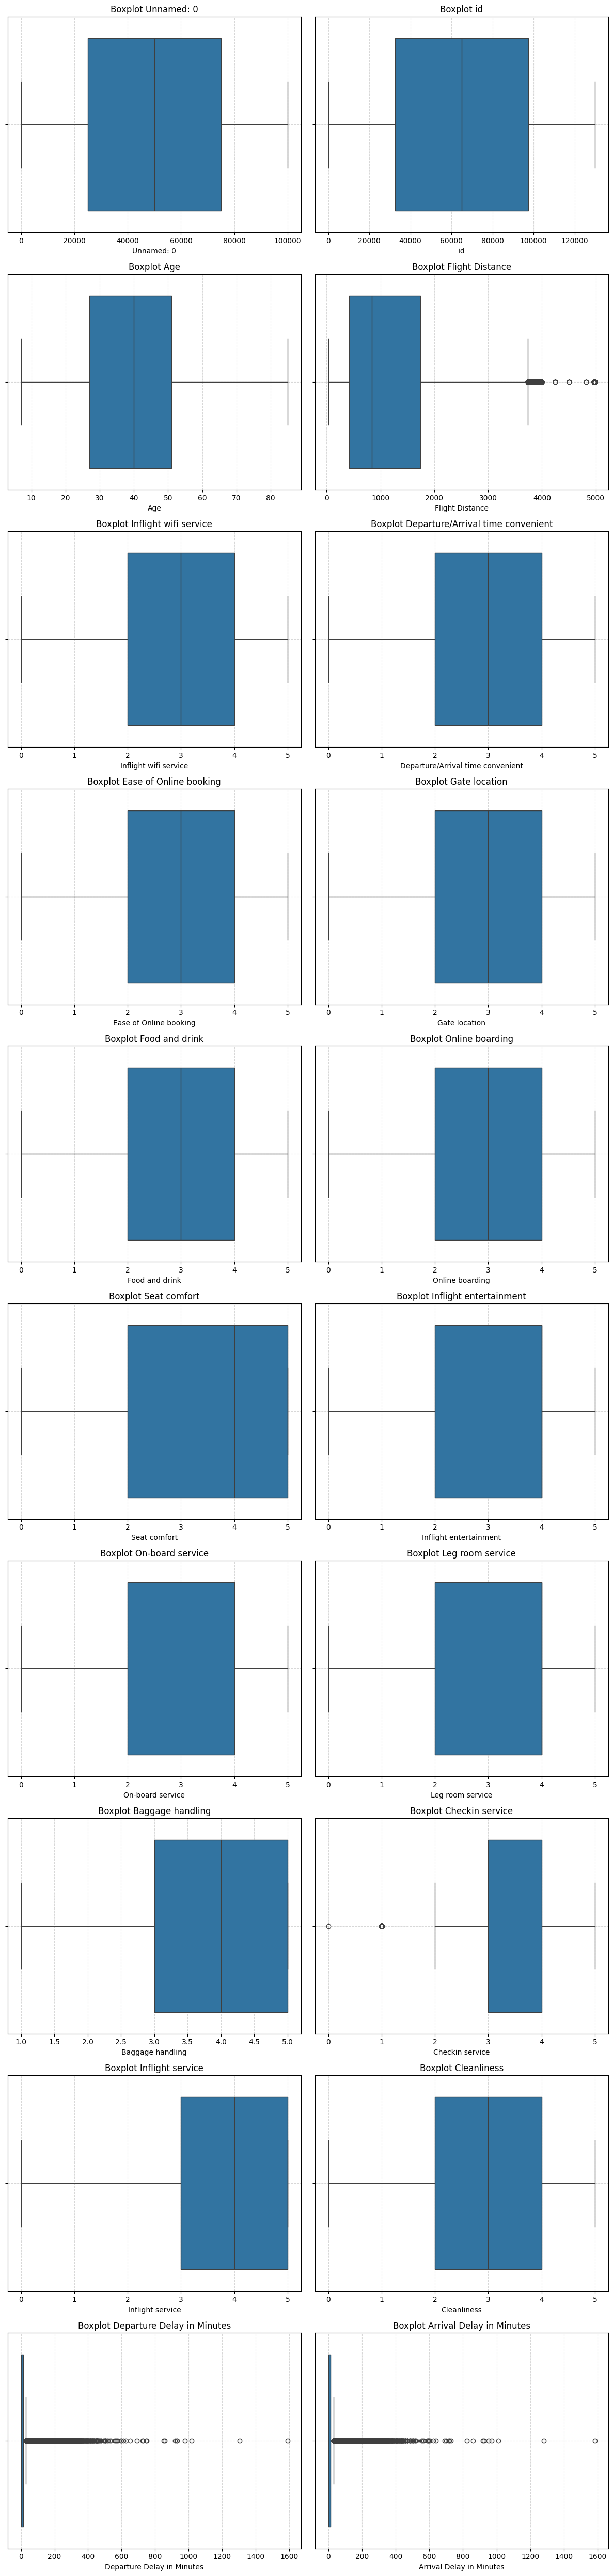

In [ ]:
# Ambil semua kolom integer
int_cols = df_cleaned.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Tentukan jumlah kolom
n_cols = len(int_cols)

# Tentukan jumlah baris (2 plot per baris)
n_rows = math.ceil(n_cols / 2)

# Buat subplot
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5*n_rows))

# Ubah axes jadi 1D array supaya mudah di-loop
axes = axes.flatten()

# Loop untuk membuat boxplot tiap kolom
for i, col in enumerate(int_cols):
    sns.boxplot(x=df_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hapus subplot kosong jika jumlah kolom ganjil
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Outlier dalam dataset ini dipertahankan karena hal tersebut adalah variasi perilaku transaksi dan bukan merupakan kesalahan data. Dengan demikian, analisis tetap merepresentasikan kondisi bisnis yang sebenarnya.

# Encoding

In [ ]:
df_raw = df_cleaned.copy()

In [ ]:
encoding = [   # kolom kategorikal yang akan di encoding
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class',
    'satisfaction'

]


label_encoders = {} # Membuat dictionary untuk menyimpan objek LabelEncoder untuk tiap kolom

for col in encoding:
    le = LabelEncoder() # Membuat instance LabelEncoder baru
    df_raw[col] = le.fit_transform(df_raw[col])
    label_encoders[col] = le   # Menyimpan LabelEncoder di dictionary supaya bisa memeriksa mapping label seperti kategori label 1 itu apa


In [ ]:
non = [
    "Flight Distance",
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness",
    "Departure Delay in Minutes",
    "Arrival Delay in Minutes"
]

In [ ]:
df_final = df_raw[non + encoding]
df_final.head()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction
0,460,3,4,3,1,5,3,5,5,4,...,4,5,5,25,18.0,1,1,1,2,0
1,235,3,2,3,3,1,3,1,1,1,...,1,4,1,1,6.0,1,0,0,0,0
2,1142,2,2,2,2,5,5,5,5,4,...,4,4,5,0,0.0,0,1,0,0,1
3,562,2,5,5,5,2,2,2,2,2,...,1,4,2,11,9.0,0,1,0,0,0
4,214,3,3,3,3,4,5,5,3,3,...,3,3,3,0,0.0,1,1,0,0,1


In [ ]:
for col, le in label_encoders.items():
    print(f"\nKolom: {col}") # Menampilkan nama kolom yang sedang dicek
    label_mapping = pd.DataFrame({ # Membuat tabel dataframe untuk melihat mapping antara angka hasil labeling dan kategori asli
        'Label': le.transform(le.classes_), # Mengubah kategori asli ke angka sesuai encoder
        'Kategori_Asli': le.classes_  # Menampilkan kategori asli
    })
    print(label_mapping)



Kolom: Gender
   Label Kategori_Asli
0      0        Female
1      1          Male

Kolom: Customer Type
   Label      Kategori_Asli
0      0  Disloyal Customer
1      1     Loyal Customer

Kolom: Type of Travel
   Label    Kategori_Asli
0      0  Business travel
1      1  Personal Travel

Kolom: Class
   Label Kategori_Asli
0      0      Business
1      1           Eco
2      2      Eco Plus

Kolom: satisfaction
   Label            Kategori_Asli
0      0  neutral or dissatisfied
1      1                satisfied


## Heatmap

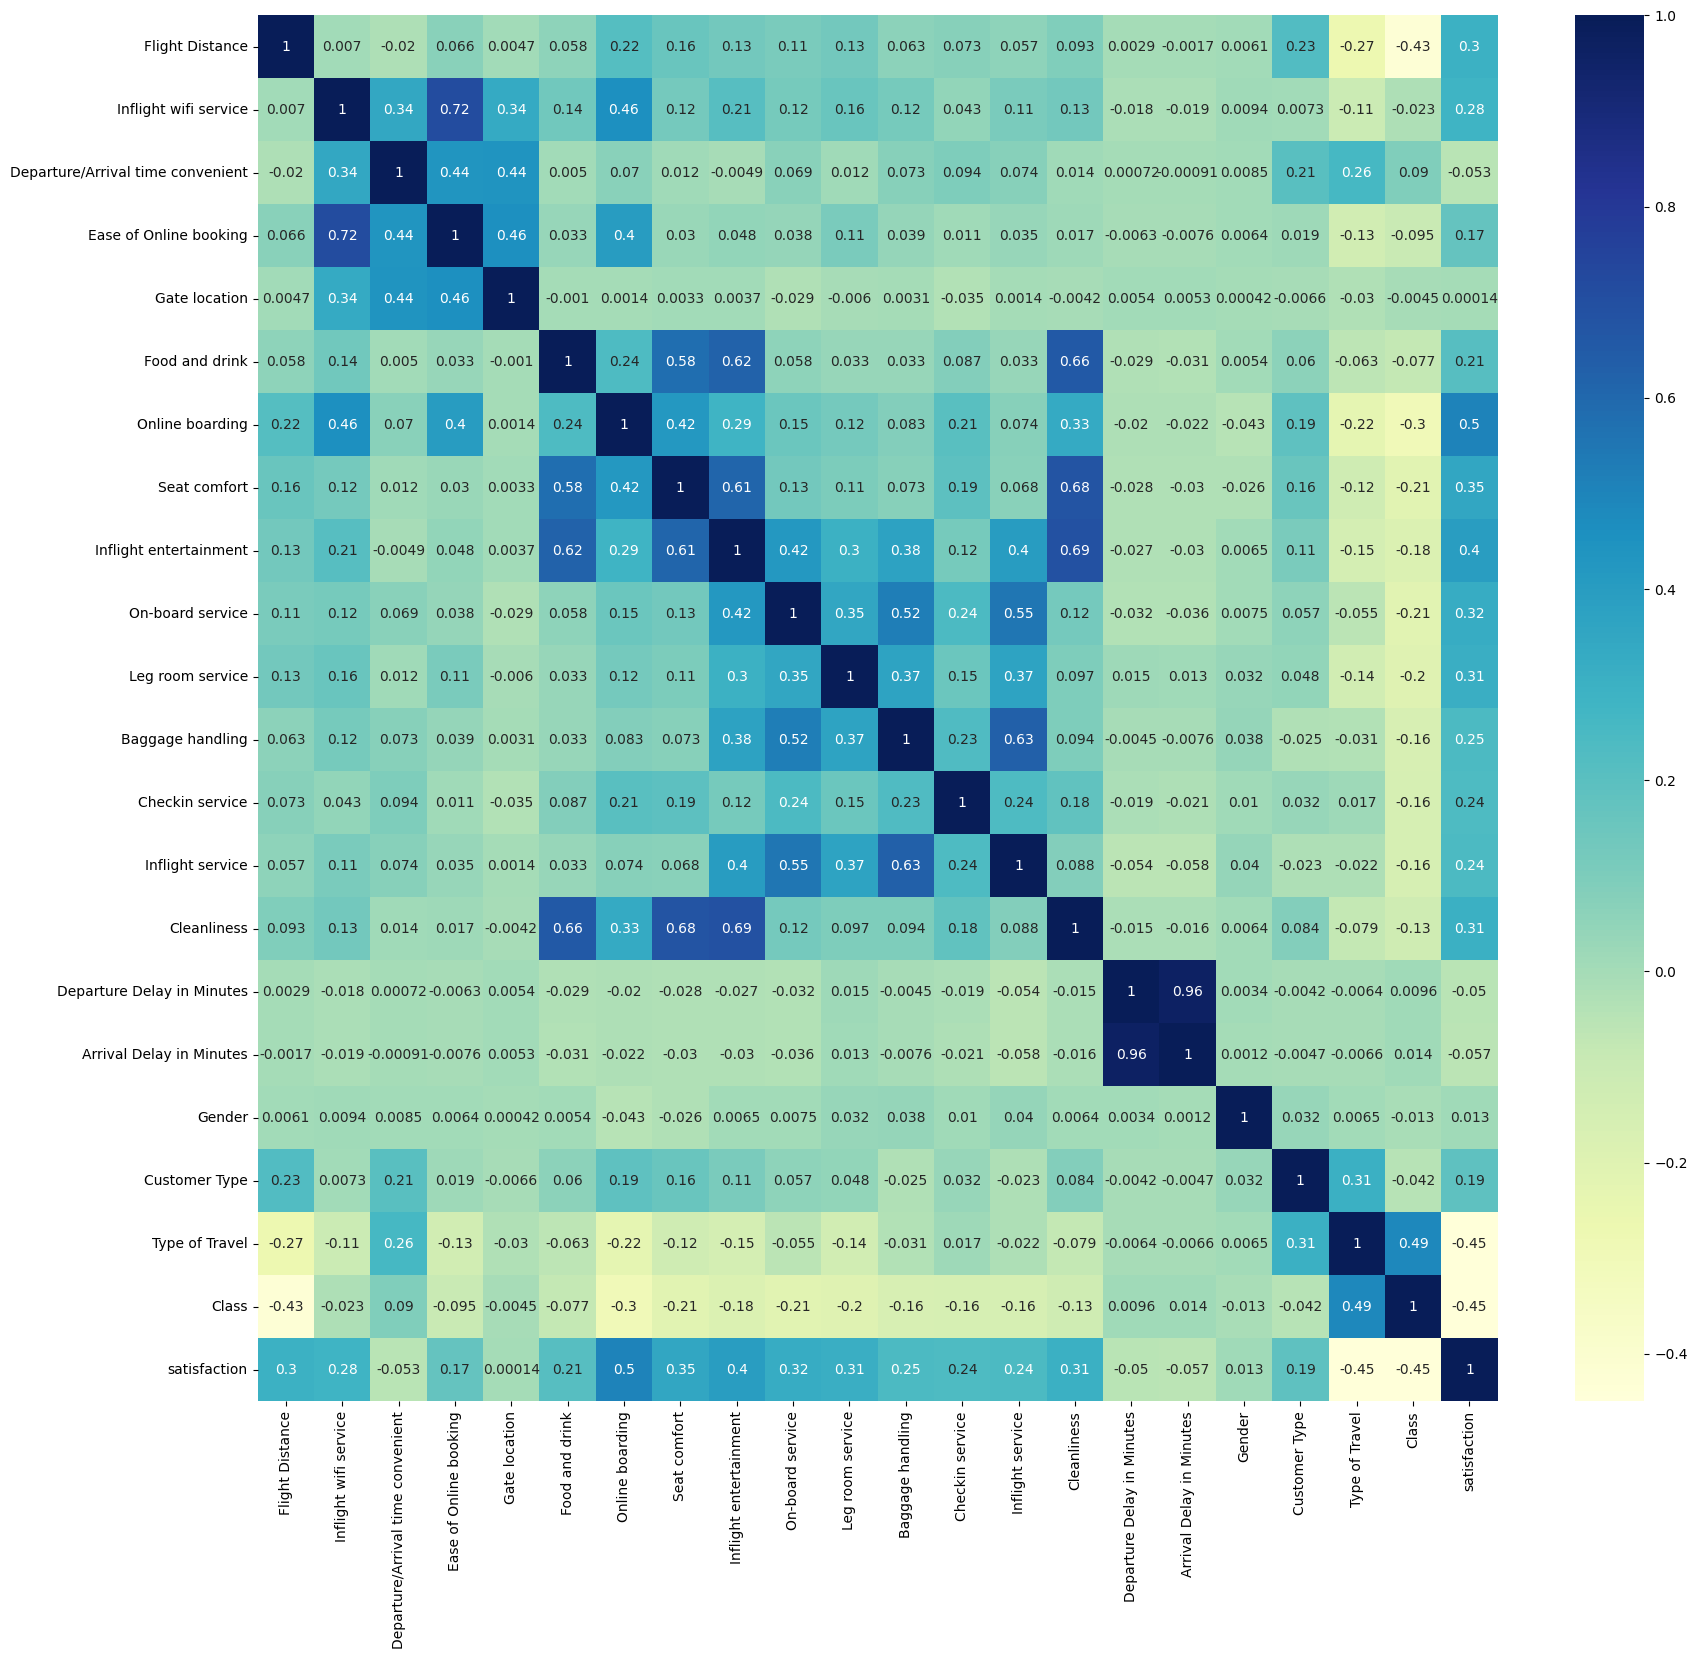

In [ ]:
plt.figure(figsize=(20, 18))

# Hitung matriks korelasi
co_mtx = df_final.corr(numeric_only=True)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Menampilkan heatmap
plt.show()

In [ ]:
df.to_excel('real_clean Customer Satisfaction and Sentiment Analysis.xlsx', index=False)